# High Park WRF-Chem PM<sub>2.5</sub>  

**Author:** Ryan Gan
**Date Created:** 2018-10-16

This Jupyter notebook contains python code that explores the estimates of WRF-Chem PM<sub>2.5</sub> for the High Park fire created by Will.

In [2]:
# loading modules
# numpy for arrays
import numpy as np
import pandas as pd 
# plotting packages
from matplotlib import pyplot as plt
import seaborn as sns
# netcdf module
import netCDF4 as nc 
# import dataset
from netCDF4 import Dataset
# import interpolate from scipy
from scipy import interpolate

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#WRF-Chem-15-x-15-km-Grids" data-toc-modified-id="WRF-Chem-15-x-15-km-Grids-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>WRF-Chem 15 x 15 km Grids</a></span></li></ul></div>

## WRF-Chem 15 x 15 km Grids

Exploring the 15 x 15 km grid first to see how well it aligns with the Colorado grid I use.

In [32]:
# read nc files -----
wrf_pm = Dataset('../data/smoke/HighParkPM25_03KM.nc')

In [33]:
# print out summary of wrf nc
print(wrf_pm)

# print out each variable detail
for v in wrf_pm.variables:
    print(wrf_pm.variables[v])

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    description: Surface PM2.5 Predictions for High Park based on WRF-Chem sims: Written by William Lassman, 2017-05-05
    dimensions(sizes): time(109), z(1), x(185), y(240)
    variables(dimensions): float64 XLAT(time,z,x,y), float64 XLONG(time,z,x,y), int32 time(time), float64 PM2.5(time,z,x,y)
    groups: 

<class 'netCDF4._netCDF4.Variable'>
float64 XLAT(time, z, x, y)
    units: degrees
    long_name: Degrees latitude
    var_desc: Time [s]
unlimited dimensions: 
current shape = (109, 1, 185, 240)
filling off

<class 'netCDF4._netCDF4.Variable'>
float64 XLONG(time, z, x, y)
    units: degrees
    long_name: Degrees longitude
    var_desc: Time [s]
unlimited dimensions: 
current shape = (109, 1, 185, 240)
filling off

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: date and time
    long_name: Date string and time of day (UTC)
    var_desc: Time [s]
unlimited dimen

Extracting out vectors of lat, lon, time, and PM<sub>2.5</sub>.

In [34]:
# extract latitude
lat = wrf_pm.variables['XLAT'][:]
# extract longitude
lon = wrf_pm.variables['XLONG'][:]
# extract time
time = wrf_pm.variables['time'][:]
# extract pm2.5
pm = wrf_pm.variables['PM2.5'][:]

Printing out minimum, mean, and max PM2.5 values.

In [35]:
print(np.min(pm), np.mean(pm), np.max(pm))

0.0 1.4956761423890326 997.43408203125


Printing out extent of latitude and longitude.

In [36]:
print(np.min(lat), np.max(lat), np.min(lon), np.max(lon))

36.109535217285156 9.969209968386869e+36 -110.12411499023438 9.969209968386869e+36


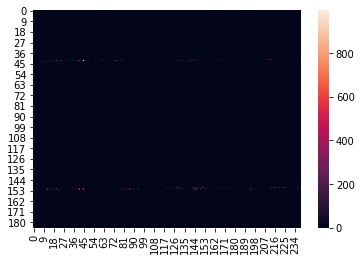

In [37]:
#np.shape(pm)
sns.heatmap(pm[20,0,:,:])